In [67]:
import torch
from torch.nn import functional as F
torch.__version__

'2.0.1'

In [4]:
a = torch.rand(4,3,32,32)
b = torch.rand(1,1,32,1)

In [11]:
b.repeat(4,1,64,1).shape


torch.Size([4, 1, 2048, 1])

In [12]:
a.transpose(1,3).shape

torch.Size([4, 32, 32, 3])

In [13]:
a.permute(0,2,3,1).shape

torch.Size([4, 32, 32, 3])

In [15]:
(a + b).shape

torch.Size([4, 3, 32, 32])

In [41]:
b=torch.rand(32,8)
a=torch.rand(32,8)
c=torch.stack([a,b,a,b,a,b], dim=0)

for i in c.split(4, dim=0):
    print(i.shape)

print("="*10)    
for i in c.chunk(3, dim=0):
    print(i.shape)

torch.Size([4, 32, 8])
torch.Size([2, 32, 8])
torch.Size([2, 32, 8])
torch.Size([2, 32, 8])
torch.Size([2, 32, 8])


In [43]:
print(
torch.all(torch.eq(a+b, torch.add(a, b))),
torch.all(torch.eq(a-b, torch.sub(a, b))),
torch.all(torch.eq(a*b, torch.mul(a, b))),
torch.all(torch.eq(a/b, torch.div(a, b))),
torch.all(torch.eq(a@b.t(), torch.mm(a, b.t()))),
torch.all(torch.eq(a@b.t(), torch.matmul(a, b.t()))),
sep='\n'
)

tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)


In [50]:
grad = torch.rand(2,3)*15
print(
    grad.min(),
    grad.max(),
    grad.median(),
    grad.clamp(10),
    grad.clamp(0,10),
    sep='\n',
)

tensor(5.7943)
tensor(12.1125)
tensor(8.8097)
tensor([[10.0000, 12.1125, 11.6315],
        [10.0000, 10.0000, 10.9744]])
tensor([[ 5.7943, 10.0000, 10.0000],
        [ 5.8483,  8.8097, 10.0000]])


In [61]:
a=torch.full([8],1.)
b=a.view(2,4)
c=a.view(2,2,2)

print(a,b,c, 
      a.norm(1),
      b.norm(1),
      c.norm(1),      
      a.norm(2),
      b.norm(2),
      c.norm(2),
      b.norm(1, dim=1),
      b.norm(1, dim=0),
      b.norm(2, dim=1),
      c.norm(1, dim=0),
      sep='\n')

tensor([1., 1., 1., 1., 1., 1., 1., 1.])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])
tensor(8.)
tensor(8.)
tensor(8.)
tensor(2.8284)
tensor(2.8284)
tensor(2.8284)
tensor([4., 4.])
tensor([2., 2., 2., 2.])
tensor([2., 2.])
tensor([[2., 2.],
        [2., 2.]])


In [75]:
x=torch.ones(1)
w=torch.full([1],2.)
print(x, w)
mse = F.mse_loss(torch.ones(1), x*w)
print(mse)
print(w.requires_grad_())
mse = F.mse_loss(torch.ones(1), x*w)
print(torch.autograd.grad(mse, [w]))
mse = F.mse_loss(torch.ones(1), x*w)
mse.backward()
print(w.grad)

tensor([1.]) tensor([2.])
tensor(1.)
tensor([2.], requires_grad=True)
(tensor([2.]),)
tensor([2.])


In [122]:
a=torch.rand(3)
a.requires_grad_()
print(a)
p=F.softmax(a,dim=0)

# p[0].backward(retain_graph=True)
# print(a.grad)
p[1].backward(retain_graph=True)
print(a.grad)
p[2].backward(retain_graph=True)
print(a.grad)


p=F.softmax(a,dim=0)

# print(torch.autograd.grad(p[0], [a], retain_graph=True))
g1 = torch.autograd.grad(p[1], [a], retain_graph=True)
print(g1)
g2 = torch.autograd.grad(p[2], [a], retain_graph=True)
print(g2)
print(g1[0]+g2[0])

tensor([0.2576, 0.9601, 0.5049], requires_grad=True)
tensor([-0.1092,  0.2491, -0.1399])
tensor([-0.1785,  0.1092,  0.0693])
(tensor([-0.1092,  0.2491, -0.1399]),)
(tensor([-0.0693, -0.1399,  0.2091]),)
tensor([-0.1785,  0.1092,  0.0693])


In [126]:
x=torch.randn(1,10)
w=torch.randn(1,10, requires_grad=True)
o=torch.sigmoid(x@w.t())
print(o.shape)

loss = F.mse_loss(torch.ones(1,1), o)
print(loss.shape)
loss.backward()
w.grad

torch.Size([1, 1])
torch.Size([])


tensor([[-0.0160, -0.0111, -0.0052, -0.0105,  0.0122,  0.0030, -0.0089,  0.0033,
          0.0167, -0.0093]])

In [127]:
x=torch.randn(1,10)
w=torch.randn(2,10, requires_grad=True)

o=torch.sigmoid(x@w.t())
print(o.shape)
loss = F.mse_loss(torch.ones(1,2), o)
loss.backward()
w.grad

torch.Size([1, 2])


tensor([[ 0.2052, -0.0051,  0.0530, -0.0575, -0.1005,  0.0330, -0.0326,  0.0458,
          0.0540,  0.0106],
        [ 0.2485, -0.0061,  0.0642, -0.0696, -0.1218,  0.0399, -0.0395,  0.0554,
          0.0654,  0.0129]])

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


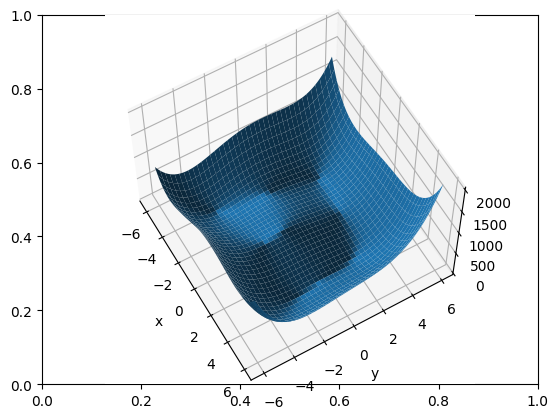

step 0: x = [-3.999000072479248, -0.0009999999310821295], f(x) = 146.0
step 2000: x = [-3.526559829711914, -2.5002429485321045], f(x) = 19.4503231048584
step 4000: x = [-3.777446746826172, -3.2777843475341797], f(x) = 0.0012130826944485307
step 6000: x = [-3.7793045043945312, -3.283174753189087], f(x) = 5.636138666886836e-09
step 8000: x = [-3.779308319091797, -3.28318190574646], f(x) = 7.248672773130238e-10
step 10000: x = [-3.7793095111846924, -3.28318452835083], f(x) = 8.822098607197404e-11
step 12000: x = [-3.7793102264404297, -3.2831854820251465], f(x) = 8.185452315956354e-12
step 14000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 16000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0
step 18000: x = [-3.7793102264404297, -3.2831859588623047], f(x) = 0.0


In [3]:
import  numpy as np
from    mpl_toolkits.mplot3d import Axes3D
from    matplotlib import pyplot as plt
import  torch



def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca()
ax = fig.add_subplot( projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


# [1., 0.], [-4, 0.], [4, 0.]
x = torch.tensor([-4., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):

    pred = himmelblau(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))


In [2]:
import  torch
import  torch.nn as nn
import  torch.nn.functional as F
import  torch.optim as optim
from    torchvision import datasets, transforms


batch_size=200
learning_rate=0.01
epochs=10

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size, shuffle=True)



w1, b1 = torch.randn(200, 784, requires_grad=True),\
         torch.zeros(200, requires_grad=True)
w2, b2 = torch.randn(200, 200, requires_grad=True),\
         torch.zeros(200, requires_grad=True)
w3, b3 = torch.randn(10, 200, requires_grad=True),\
         torch.zeros(10, requires_grad=True)

torch.nn.init.kaiming_normal_(w1)
torch.nn.init.kaiming_normal_(w2)
torch.nn.init.kaiming_normal_(w3)


def forward(x):
    x = x@w1.t() + b1
    x = F.relu(x)
    x = x@w2.t() + b2
    x = F.relu(x)
    x = x@w3.t() + b3
    x = F.leaky_relu(x,negative_slope=0.01)
    return x



optimizer = optim.SGD([w1, b1, w2, b2, w3, b3], lr=learning_rate)
criteon = nn.CrossEntropyLoss()

for epoch in range(epochs):

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(-1, 28*28)

        logits = forward(data)
        loss = criteon(logits, target)

        optimizer.zero_grad()
        loss.backward()
        # print(w1.grad.norm(), w2.grad.norm())
        optimizer.step()

        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))


    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data = data.view(-1, 28 * 28)
        logits = forward(data)
        test_loss += criteon(logits, target).item()

        pred = logits.data.max(1)[1]
        correct += pred.eq(target.data).sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.545084
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.943997
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.518978

Test set: Average loss: 0.0019, Accuracy: 8892/10000 (89%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.334896
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.395861
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.307082

Test set: Average loss: 0.0014, Accuracy: 9160/10000 (92%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.223083
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.246840
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.290644

Test set: Average loss: 0.0012, Accuracy: 9303/10000 (93%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.228551
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.330661
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.240630

Test set: Average loss: 0.0011, Accuracy: 9366/10000 (94%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.236079
Train Epoch: 4 [20000/60000 (33%)]	Loss: 0.214693
Train Epoch: 4 [40000/60000 (67%)]	Loss: 0.229796

Test set: Average loss: 0.0010

In [6]:
num_gpus = torch.cuda.device_count()
for gpu_index in range(num_gpus):    
    device = torch.device(f'cuda:{gpu_index}')    
    device_properties = torch.cuda.get_device_properties(device)    
    print(f'Device {gpu_index}:', device_properties)

In [52]:
logits = torch.randn(6,  10)
pred = F.softmax(logits,dim=1)
pred_label = pred.argmax(dim=1)
print(pred_label, logits.argmax(dim=1), sep='\n')
label=torch.tensor([9,3,2,4,1,5])
correct = torch.eq(pred_label, label)
print(correct, correct.sum().float().item()/len(correct))

tensor([7, 9, 6, 9, 3, 8])
tensor([7, 9, 6, 9, 3, 8])
tensor([False, False, False, False, False, False]) 0.0
